<a href="https://colab.research.google.com/github/msepulveda2/PDI/blob/main/PDI_PRACTICA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTE 1 - PROCESAMIENTO GEOMETRICO**

EJERCICIO 1

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Cargar la imagen en escala de grises
imagen = cv2.imread('radiografia.jpg', cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen
alto, ancho = imagen.shape
alto, ancho = imagen.shape

In [16]:
# Definir la matriz de traslación con valores decimales
tx, ty = 100.5, 100.7  # Desplazamiento en X e Y con decimales
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar la traslación con interpolación
imagen_trasladada = cv2.warpAffine(imagen, M, (ancho, alto), flags=cv2.INTER_LINEAR)

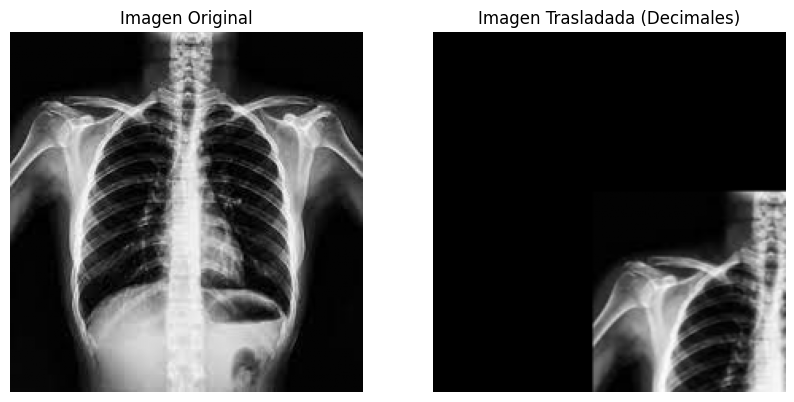

In [17]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada (Decimales)")
plt.axis("off")

plt.show()

EJERCICIO 2

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:

# Cargar la imagen en escala de grises
imagen = cv2.imread('radiografia.jpg', cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen
alto, ancho = imagen.shape

In [20]:
# Definir traslación (50 píxeles en X, 30 píxeles en Y)
tx, ty = 50, 30
M_translacion = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar traslación
imagen_trasladada = cv2.warpAffine(imagen, M_translacion, (ancho, alto))

In [28]:
# Definir rotación (45° alrededor del centro de la imagen)
angulo = 45
centro = (ancho // 2, alto // 2)  # Centro de la imagen
escala = 1.0  # Sin cambios en el tamaño

M_rotacion = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicar rotación sobre la imagen trasladada
imagen_final = cv2.warpAffine(imagen_trasladada, M_rotacion, (ancho, alto))

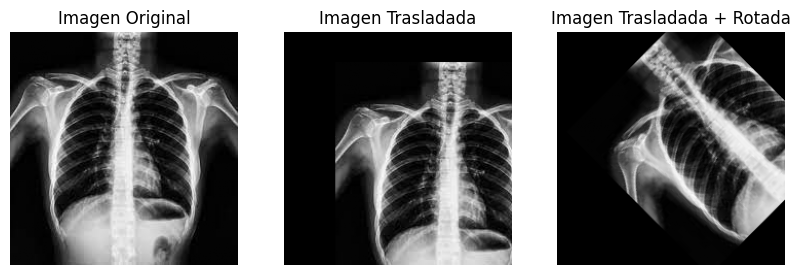

In [29]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_final, cmap="gray")
plt.title("Imagen Trasladada + Rotada")
plt.axis("off")

plt.show()

EJERCICIO 3

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Cargar la imagen en escala de grises
imagen = cv2.imread('radiografia.jpg', cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen
alto, ancho = imagen.shape

In [26]:
# Definir traslación (50 píxeles en X, 30 píxeles en Y)
tx, ty = 50, 30
M_translacion = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar traslación
imagen_trasladada = cv2.warpAffine(imagen, M_translacion, (ancho, alto))

In [34]:
# Definir rotación + escalado (45° alrededor del centro con 150 de escala)
angulo = 45
centro = (ancho // 2, alto // 2)  # Centro de la imagen

#Escala al 150%
escala_150 = 1.5
M_rotacion_escala_150 = cv2.getRotationMatrix2D(centro, angulo, escala_150)

# Aplicar rotación y escalado al 150%
imagen_escalada_150 = cv2.warpAffine(imagen_trasladada, M_rotacion_escala_150, (ancho, alto))


#Escala al 50%
escala_50 = 0.5
M_rotacion_escala_50 = cv2.getRotationMatrix2D(centro, angulo, escala_50)

# Aplicar rotación y escalado al 150%
imagen_escalada_50 = cv2.warpAffine(imagen_trasladada, M_rotacion_escala_50, (ancho, alto))

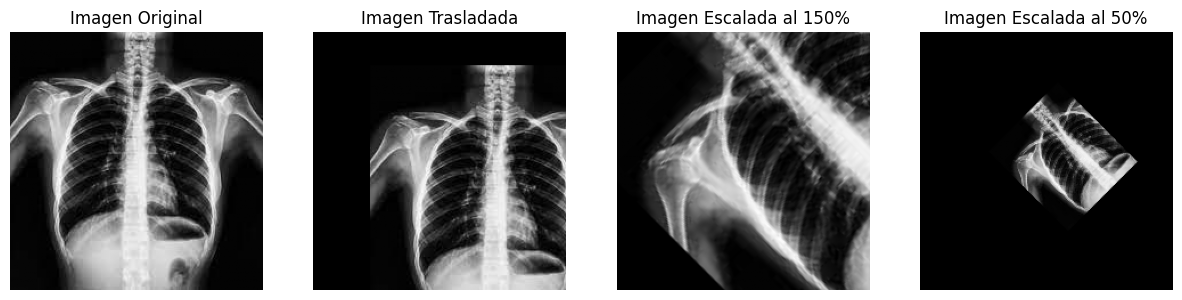

In [35]:
# Mostrar imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(imagen_escalada_150, cmap="gray")
plt.title("Imagen Escalada al 150%")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(imagen_escalada_50, cmap="gray")
plt.title("Imagen Escalada al 50%")
plt.axis("off")

plt.show()

**PARTE 2 - ECUALIZACIÓN DE HISTOGRAMA**

EJERCICIO 1

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

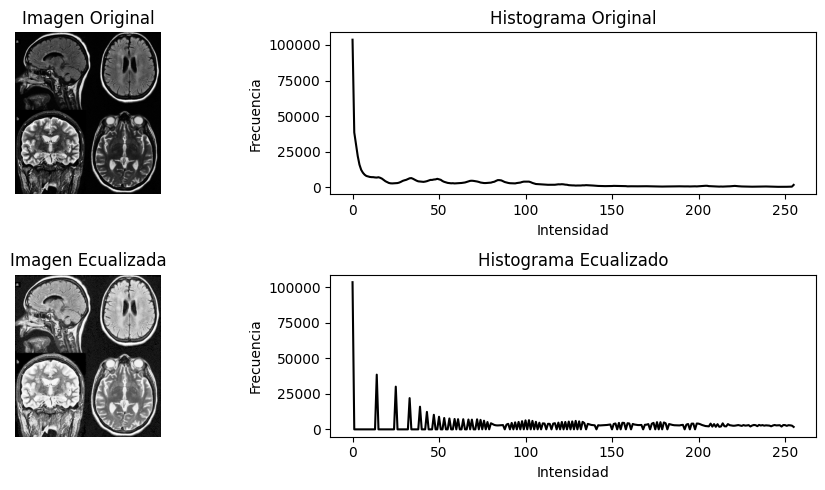

In [37]:
# Cargar la imagen en escala de grises
imagen = cv2.imread('resonancia_cerebro.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar ecualización de histograma
imagen_ecualizada = cv2.equalizeHist(imagen)

# Calcular histogramas antes y después
hist_original = cv2.calcHist([imagen], [0], None, [256], [0,256])
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0,256])

# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
# Imagen Ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap="gray")
plt.title("Imagen Ecualizada")
plt.axis("off")

# Histograma Ecualizado
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color="black")
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

